<a href="https://colab.research.google.com/github/Shweta-singh-davv/python-data-science/blob/main/Telecom_churn_pickyourtrail_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#loading important modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report


In [2]:
#loading the dataset
telecom=pd.read_csv("/content/Telco-Customer-Churn (1) (1).csv")


In [ ]:
telecom.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
telecom.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# it seems that there are no null values in the dataset. Let's proceed further.
# most of the columns in the dataset which are object type need to be converted to category type.such as gender,partner etc.
# total charges should be changed from object to float
# column senior citizen should be of category type

telecom =telecom.astype({"gender":"category","SeniorCitizen":"category","Partner":"category","Dependents":"category","PhoneService":"category",
                       "MultipleLines":"category","InternetService":"category","OnlineSecurity":"category","OnlineBackup":"category",
                        "DeviceProtection":"category","TechSupport":"category","StreamingTV":"category","StreamingMovies":"category",
                       "Contract":"category","PaperlessBilling":"category","PaymentMethod":"category","Churn":"category" })

In [4]:
# now lets convert column total charges from object to int datatype
# for this first we should check for any null values. after that if there are no null values, it ca be changed to int type.
print(telecom['TotalCharges'].isnull().sum())

# now convert to numeric with forcing errors to NaN (useful if there are non-numeric values or any character other than a number)
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')

# Handling missing values if any
telecom['TotalCharges'].fillna(0, inplace=True)  # filling with the value 0 so that if the customers are new subscribers
                                                 # they already have very minimal total charges. considering that possibility, fiiling
                                                 #0 seems reasonable since mean, mediam values will be too high for probable new customers

# Convert to int type
telecom['TotalCharges'] = telecom['TotalCharges'].astype(int)


0


In [ ]:
telecom.info() # again checking our dataset to see the changes made in datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [ ]:
# checking for missing values
print(telecom.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Now our dataset is ready, lets proceed towards data visualisation
# following insights can be derived from our dataset.
#what percent of customers have been churned ?
#relationship of churned data with respect to each feature in the dataset
#what is the tenure distribution across dataset?
# what is monthly and total charges distribution across dataset?
# how monthly and total charges affect the churn rate of the customers?
# distribution of tenure across gender, and parternership
# distribution of total charges across tenure and partenership?
# do senior citizen relative to churn rate?
# churn with repect to payment method


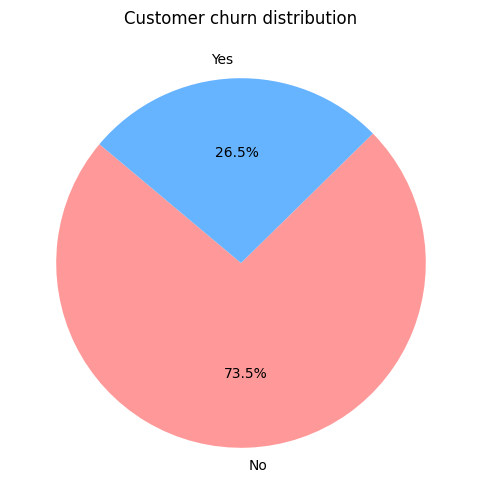

In [ ]:
# 1. what percent of customers have been churned?
counts = telecom['Churn'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Customer churn distribution')
plt.show()

In [ ]:
# insights:- 26.5% of the customers have been churned out. lets find out various possible reasons for the same in
# upcoming visualisations

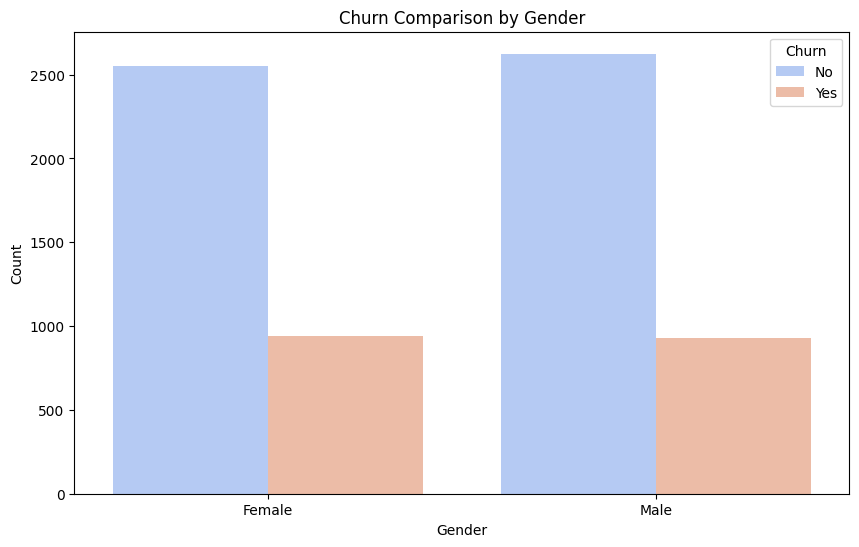

In [ ]:
# relationship of each categorical feature with respect to customer churn
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='Churn', data=telecom, palette='coolwarm')
plt.title('Churn Comparison by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()


In [ ]:
#insight:- we can see that difference in churn rate for both the genders is insignificant. Therfore, we can conclude
# that churn is not affected by gender.

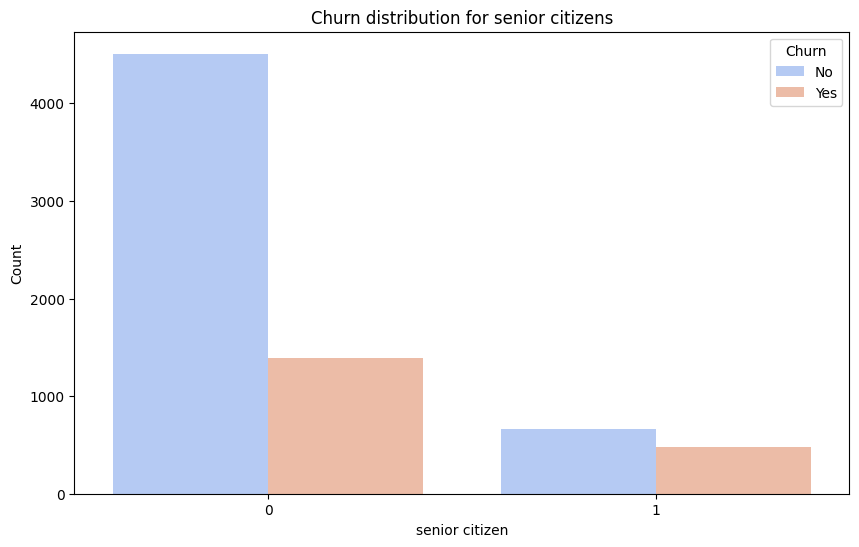

In [ ]:
# churn with respect to seniorcitizen
plt.figure(figsize=(10, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=telecom, palette='coolwarm')
plt.title('Churn distribution for senior citizens')
plt.xlabel('senior citizen')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [ ]:
# for senior citizens it can be seen that the distribution for churn and not churn is very close to each other.
# lets find out whether senior citizens are having higher total charges or not.

<ipython-input-20-c71be5a82cc0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SeniorCitizen', y='TotalCharges', data=telecom, palette='coolwarm')


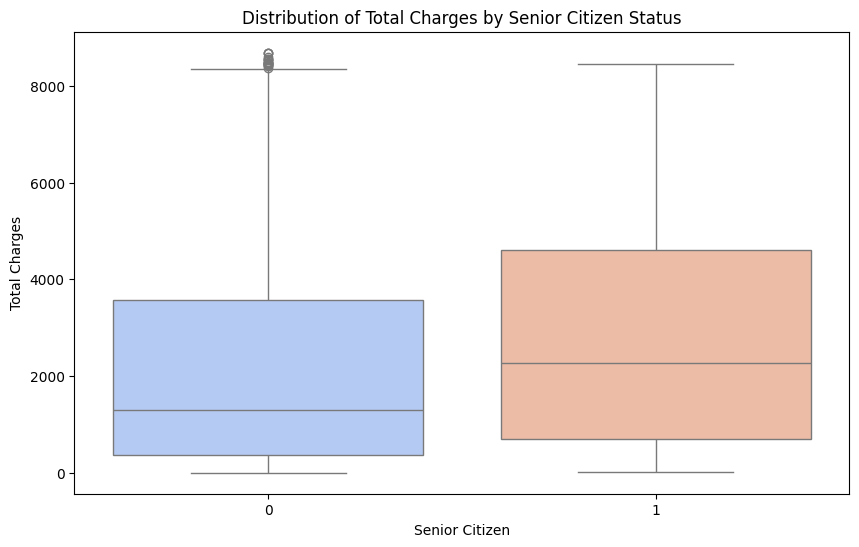

<ipython-input-20-c71be5a82cc0>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = telecom.groupby('SeniorCitizen')['TotalCharges'].describe()


                count         mean          std   min    25%     50%      75%  \
SeniorCitizen                                                                   
0              5901.0  2176.553127  2233.114837   0.0  359.0  1291.0  3562.00   
1              1142.0  2810.003503  2364.306716  19.0  689.0  2263.5  4599.75   

                  max  
SeniorCitizen          
0              8684.0  
1              8443.0  


In [ ]:
# Create a box plot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='SeniorCitizen', y='TotalCharges', data=telecom, palette='coolwarm')
plt.title('Distribution of Total Charges by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Total Charges')
plt.show()

# Calculate summary statistics
summary_stats = telecom.groupby('SeniorCitizen')['TotalCharges'].describe()
print(summary_stats)

In [ ]:
# Count occurrences of each category
counts = telecom['SeniorCitizen'].value_counts()

# Calculate the percentage of each category
percentages = (counts / counts.sum()) * 100
print(percentages)


SeniorCitizen
0    83.785319
1    16.214681
Name: count, dtype: float64


In [ ]:
# even though the senior citizens are just 16% customers in the dataset, they are paying on an average more Total charges
# to the telecom company. for example , mean totalcharges of 83% population which is not senior citizen is 2176 rupees
#where as for senior citizens, it is 2810 rupees.

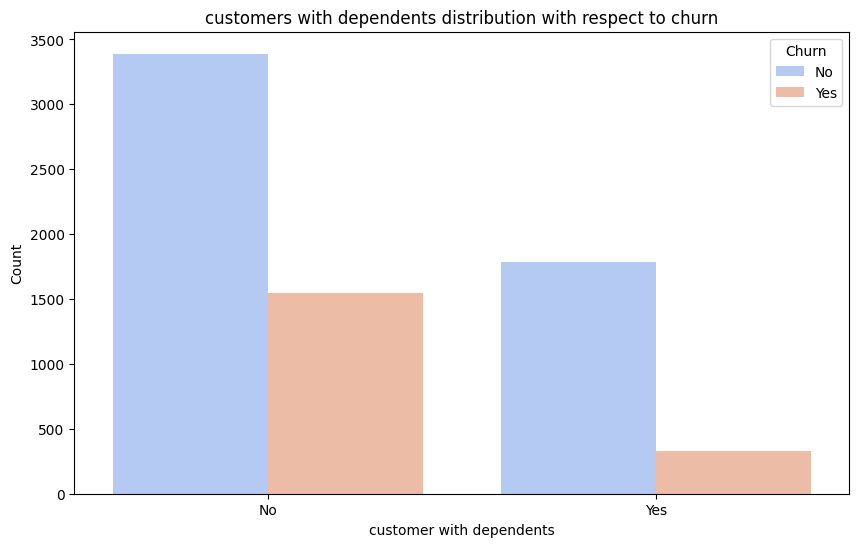

In [ ]:
# lets see , whether customers with dependents are more in churn process or not
plt.figure(figsize=(10, 6))
sns.countplot(x='Dependents', hue='Churn', data=telecom, palette='coolwarm')
plt.title('customers with dependents distribution with respect to churn')
plt.xlabel('customer with dependents')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [ ]:
# customers with dependents have very low churn rate. therefore, dependents are not responsible for the churn process

<ipython-input-23-9e6460e0b0a8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=telecom, palette='coolwarm')


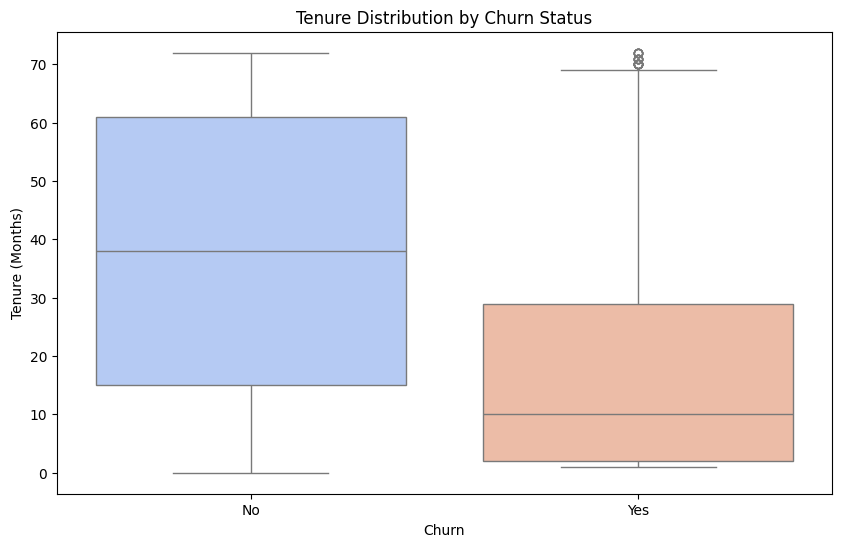

In [ ]:
# distribution of tenure with repect to churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=telecom, palette='coolwarm')
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

In [ ]:
# customers with lower tenure are more likely to churn . as can be seen in figure, non-churn customers have tenure
# spread range for 25 to 75 percent of customers around 15 to 60 months but for churn customers , tenure range is very low
# with median around 7 months.

<ipython-input-25-57ead9f77e17>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=telecom, palette='coolwarm')


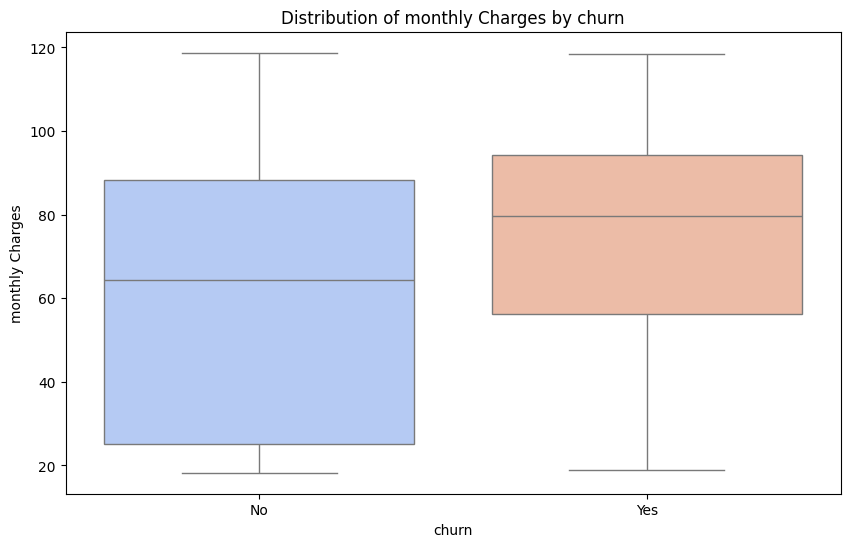

In [ ]:
# monthly charges with respect to churn rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=telecom, palette='coolwarm')
plt.title('Distribution of monthly Charges by churn')
plt.xlabel('churn')
plt.ylabel('monthly Charges')
plt.show()

In [ ]:
# customers with higher monthly charges are churning more than the customers with low monthly charges.
# More than 50% percent of non churn customers have monthly charges below 65 rupees.

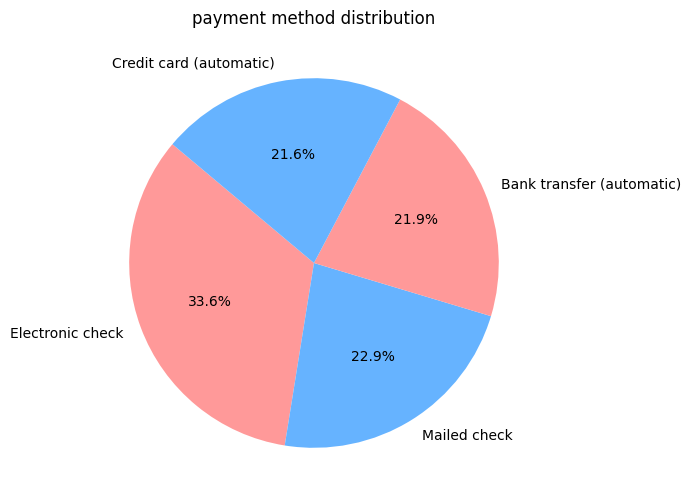

In [ ]:
# distribution of payment methods
counts = telecom['PaymentMethod'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('payment method distribution')
plt.show()


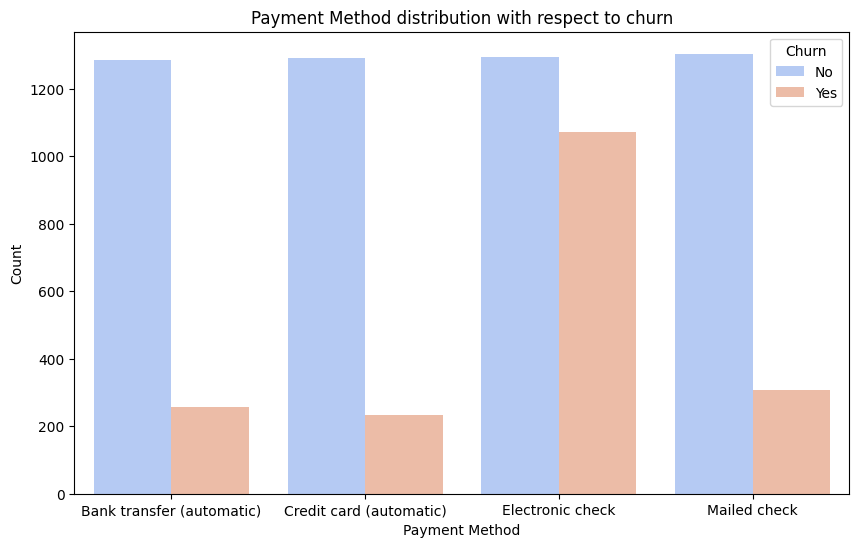

In [ ]:
# distribution of payment methods with repect to churn
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=telecom, palette='coolwarm')
plt.title('Payment Method distribution with respect to churn')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [ ]:
# electronic checks have 33.6% share in the payment methods used by the customers and most of the customers in electronic
#checks are getting churned.

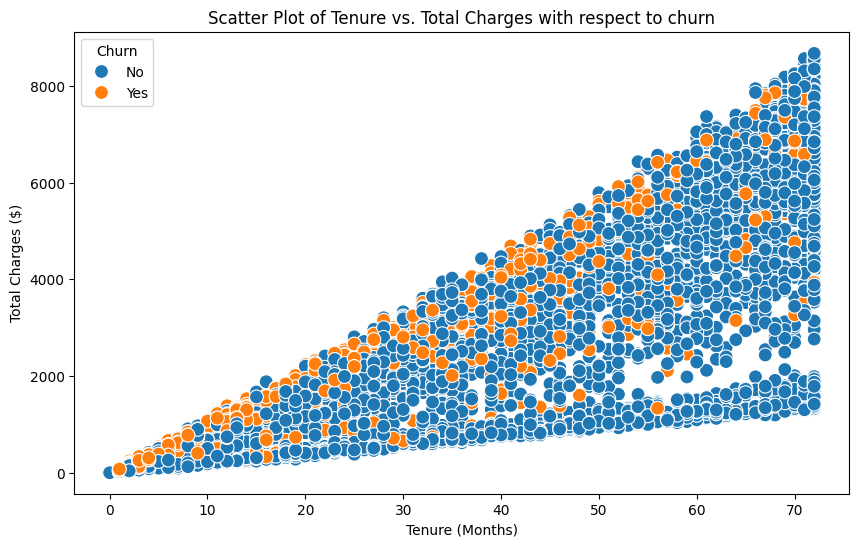

In [ ]:
# lets see distribution od tenure with respect to total charges
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='TotalCharges',hue='Churn', data=telecom, color='blue', edgecolor='w', s=100)
plt.title('Scatter Plot of Tenure vs. Total Charges with respect to churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Total Charges ($)')
plt.show()

In [ ]:
# we can see that in any of the monthly tenure, as soon as the totalcharges get at higher end, churning starts to happen.
# that means customers are not preferring higher billig amount.

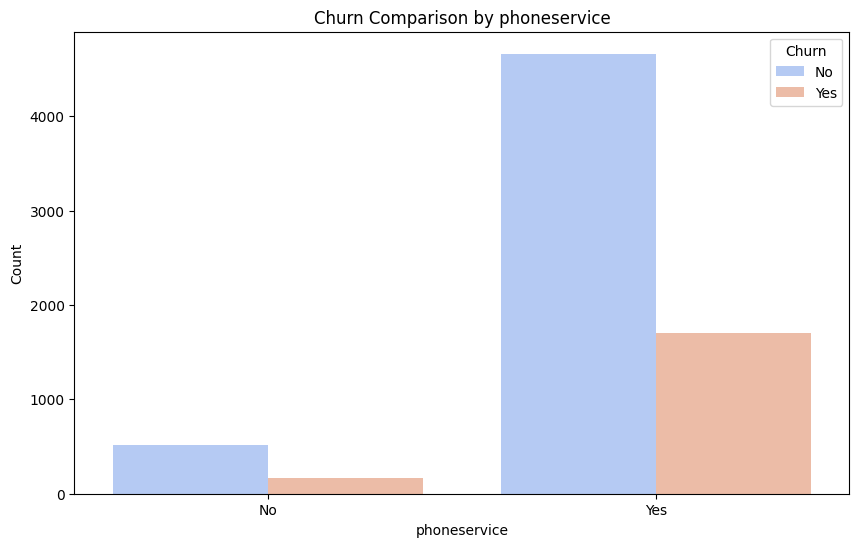

In [ ]:
# relationship of each categorical feature with respect to customer churn
#PhoneService with respect to churn
plt.figure(figsize=(10, 6))
sns.countplot(x='PhoneService', hue='Churn', data=telecom, palette='coolwarm')
plt.title('Churn Comparison by phoneservice')
plt.xlabel('phoneservice')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

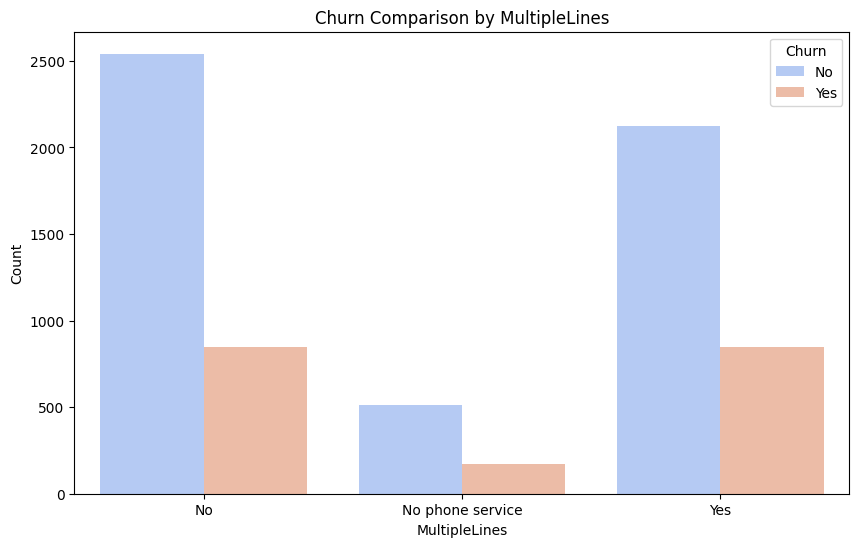

In [ ]:
# relationship of each categorical feature with respect to customer churn
plt.figure(figsize=(10, 6))
sns.countplot(x='MultipleLines', hue='Churn', data=telecom, palette='coolwarm')
plt.title('Churn Comparison by MultipleLines')
plt.xlabel('MultipleLines')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

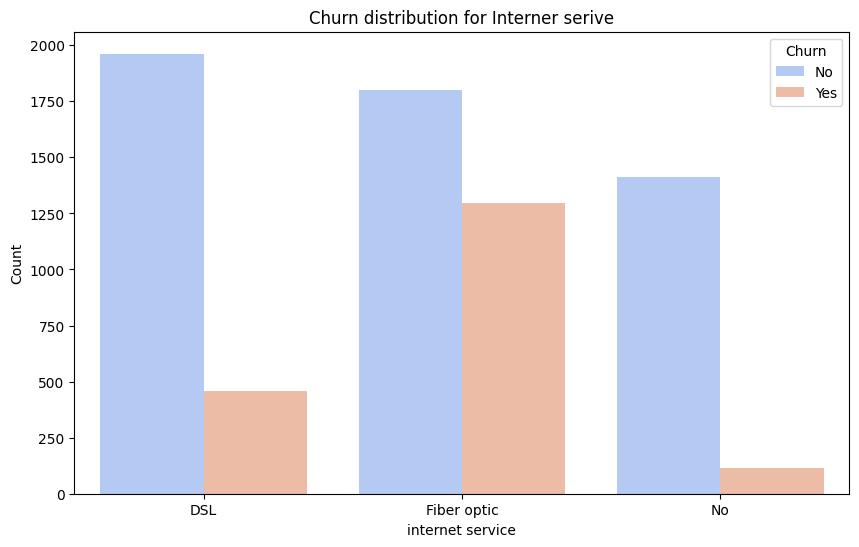

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=telecom, palette='coolwarm')
plt.title('Churn distribution for Interner serive')
plt.xlabel('internet service')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [ ]:
#customers with inernet service of fibre optics are getting more churned in comparison toother services

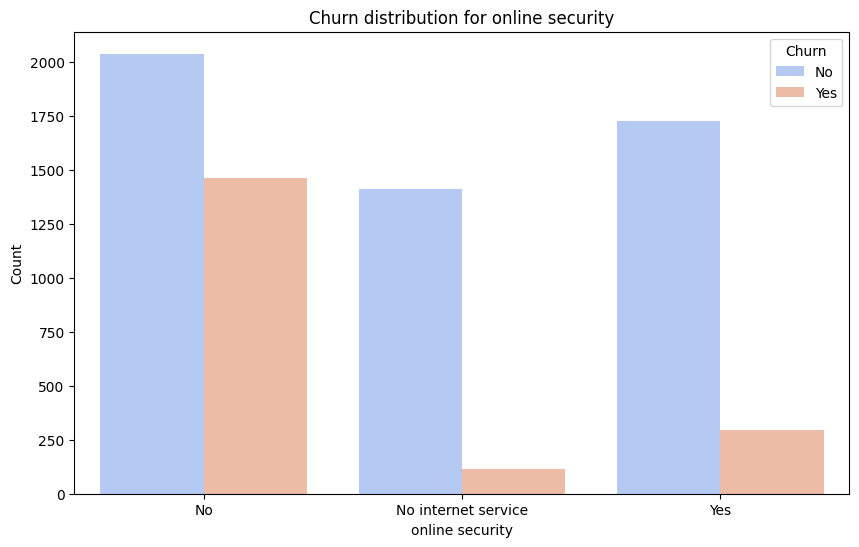

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OnlineSecurity', hue='Churn', data=telecom, palette='coolwarm')
plt.title('Churn distribution for online security')
plt.xlabel('online security')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [ ]:
#customers with no online security are getting more churned in comparison to other customers.

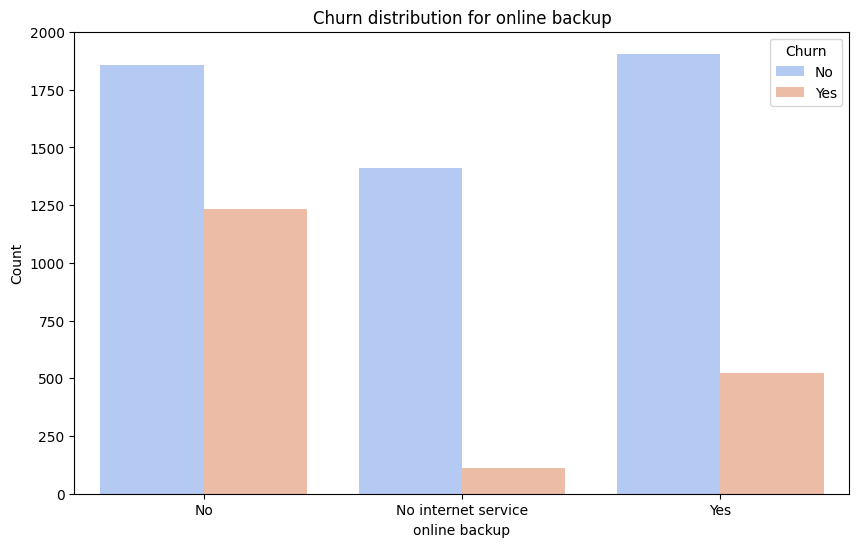

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OnlineBackup', hue='Churn', data=telecom, palette='coolwarm')
plt.title('Churn distribution for online backup')
plt.xlabel('online backup')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [ ]:
#customers with no online backup are getting more churned

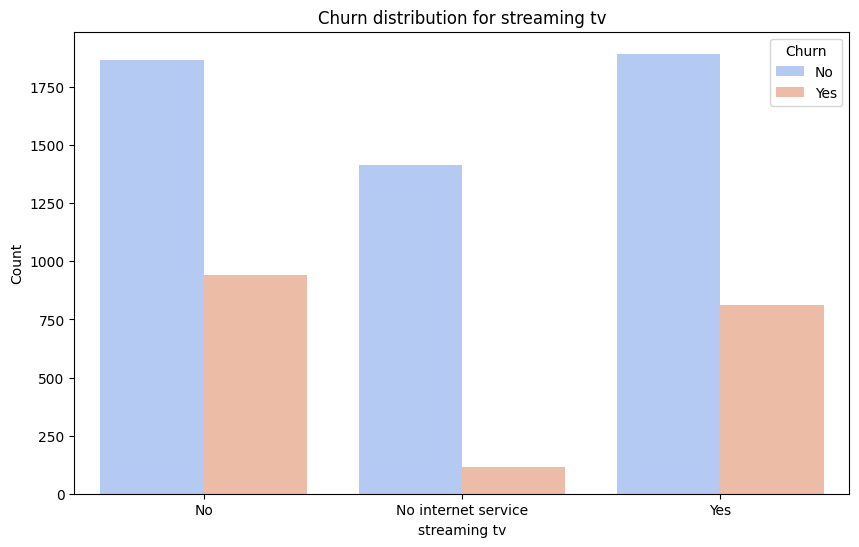

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='StreamingTV', hue='Churn', data=telecom, palette='coolwarm')
plt.title('Churn distribution for streaming tv')
plt.xlabel('streaming tv')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

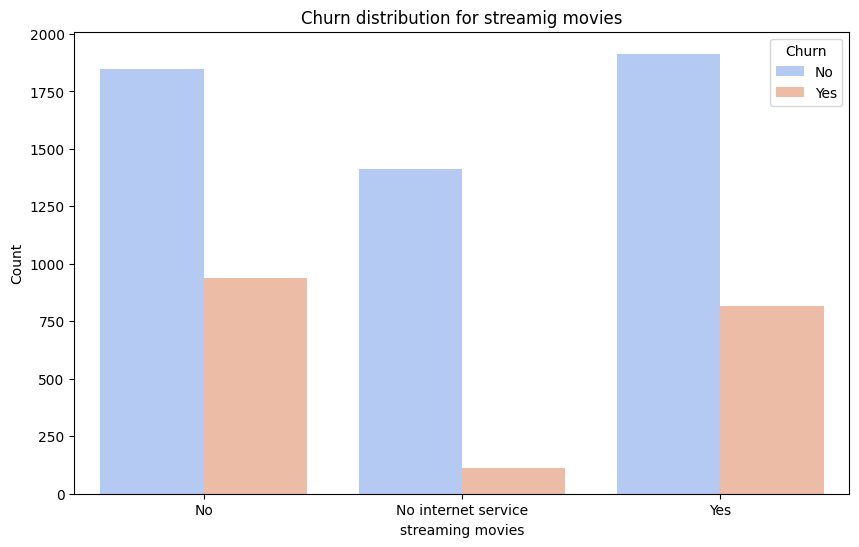

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='StreamingMovies', hue='Churn', data=telecom, palette='coolwarm')
plt.title('Churn distribution for streamig movies')
plt.xlabel('streaming movies')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

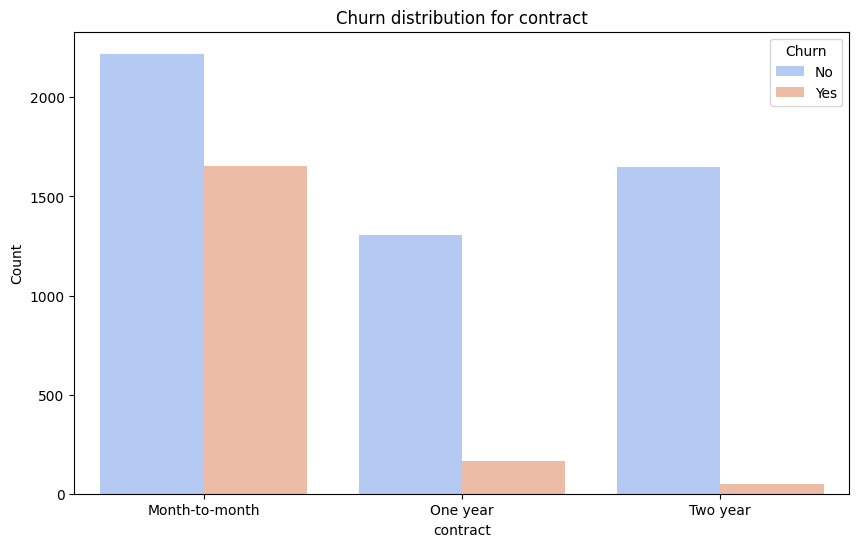

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=telecom, palette='coolwarm')
plt.title('Churn distribution for contract')
plt.xlabel('contract')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [ ]:
#customers with month to month contract have a huge churn rate than the other types of contracts

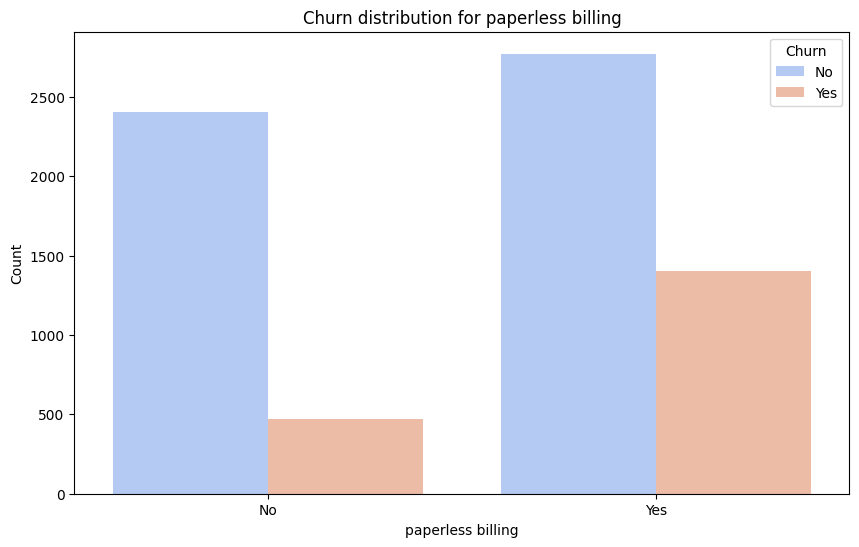

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PaperlessBilling', hue='Churn', data=telecom, palette='coolwarm')
plt.title('Churn distribution for paperless billing')
plt.xlabel('paperless billing')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [ ]:
#customers with paperless billing have a major churn rate comparing to paper billing.

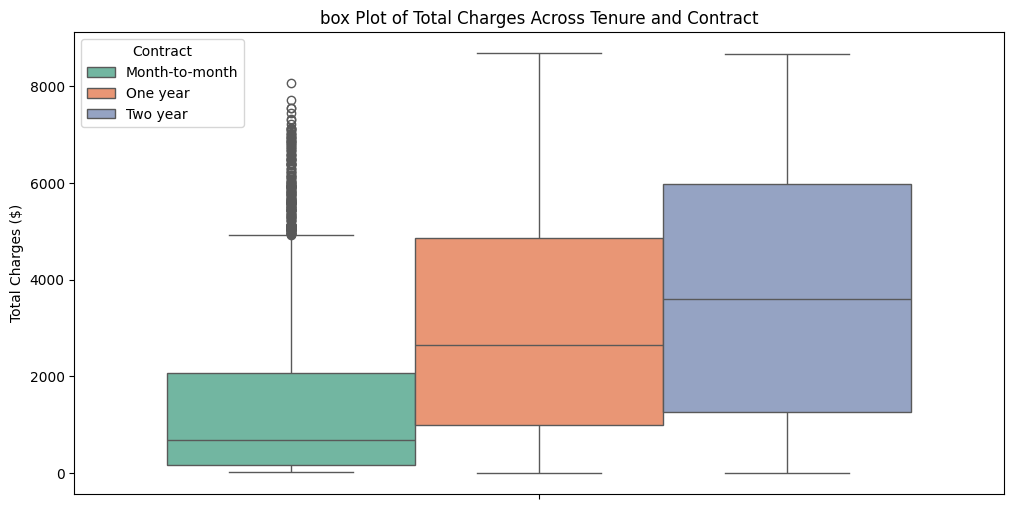

In [9]:
# Creating a violin plot to show distribution of Total with respect to Contract
plt.figure(figsize=(12, 6))
sns.boxplot( y='TotalCharges', hue='Contract', data=telecom, palette='Set2')
plt.title('box Plot of Total Charges Across Tenure and Contract')

plt.ylabel('Total Charges ($)')
plt.show()

In [ ]:
# it can be seen that total charges increses with the tenure contract but there are many outliers in the month to month
#contract where the total charges are more than 5000 dollars. lets inspect these outliers.

In [ ]:
outliers = telecom[(telecom['Contract'] == 'Month-to-month') & (telecom['TotalCharges'] > 5000)]

# Display the outliers
print(outliers)

      customerID  gender SeniorCitizen Partner Dependents  tenure  \
13    0280-XJGEX    Male             0      No         No      49   
61    1215-FIGMP    Male             0      No         No      60   
93    6067-NGCEU  Female             0      No         No      65   
110   0486-HECZI    Male             0     Yes         No      55   
197   6168-YBYNP    Male             0      No         No      59   
...          ...     ...           ...     ...        ...     ...   
6871  4070-OKWVH  Female             0     Yes         No      52   
6952  6394-MFYNG  Female             0      No         No      48   
6965  7789-CRUVC  Female             1     Yes         No      61   
7023  1035-IPQPU  Female             1     Yes         No      63   
7034  0639-TSIQW  Female             0      No         No      67   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
13            Yes           Yes     Fiber optic             No  ...   
61            Yes           Y

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV,KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score,roc_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [23]:
# Splitting the data
X = telecom.drop('Churn', axis=1)
Y = telecom['Churn']

# Encoding categorical variables
for col in X.columns:
    if X[col].dtype == 'category' or X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Splitting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Calculate metrics
accuracy = accuracy_score(Y_test, y_pred) * 100
classification_rep = classification_report(Y_test, y_pred)


# Print results
print(f"Accuracy score of Logistic Regression: {accuracy:.2f}%")
print("\nClassification Report:")
print(classification_rep)



Accuracy score of Logistic Regression: 81.76%

Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1036
         Yes       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

